In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [83]:
mydata = pd.read_csv('D:/Mini Project/SolarPrediction.csv')

In [84]:
mydata

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [85]:
import datetime

#Date

mydata['Year'] = pd.DatetimeIndex(mydata['Data']).year
mydata['Month'] = pd.DatetimeIndex(mydata['Data']).month
mydata['Day'] = pd.DatetimeIndex(mydata['Data']).day
mydata.head()

#Time 

mydata['Hour'] = pd.DatetimeIndex(mydata['Time']).hour
mydata['Minute'] = pd.DatetimeIndex(mydata['Time']).minute
mydata['Second'] = pd.DatetimeIndex(mydata['Time']).second

mydata.head()


mydata['SunPerDay'] = pd.DatetimeIndex(mydata['TimeSunSet']) - pd.DatetimeIndex(mydata['TimeSunRise'])
mydata.head()

mydata['SunPerDayHours'] = pd.DatetimeIndex(mydata['TimeSunSet']).hour - pd.DatetimeIndex(mydata['TimeSunRise']).hour 

In [86]:
mydata.drop('Time', axis = 1, inplace=True)
mydata.drop('Data', axis = 1, inplace=True)
mydata.drop('TimeSunRise', axis = 1, inplace=True)
mydata.drop('TimeSunSet', axis = 1, inplace=True)
mydata.drop('SunPerDay', axis = 1, inplace=True)

mydata.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [87]:
mydata.isnull().sum()

UNIXTime                  0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
SunPerDayHours            0
dtype: int64

In [88]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   Year                    32686 non-null  int32  
 8   Month                   32686 non-null  int32  
 9   Day                     32686 non-null  int32  
 10  Hour                    32686 non-null  int32  
 11  Minute                  32686 non-null  int32  
 12  Second                  32686 non-null  int32  
 13  SunPerDayHours          32686 non-null  int32  
dtypes: float64(4), int32(7), int64(3)
memo

In [89]:
mydata.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,2016.0,10.526066,15.825766,11.557425,27.556691,17.441902,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.0,1.096691,8.711824,6.912034,17.268507,12.951109,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,2016.0,9.000000,1.000000,0.000000,0.000000,0.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,2016.0,10.000000,9.000000,6.000000,15.000000,5.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,2016.0,11.000000,16.000000,12.000000,30.000000,18.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,2016.0,11.000000,23.000000,18.000000,45.000000,22.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,2016.0,12.000000,31.000000,23.000000,57.000000,59.000000,12.000000


<Axes: >

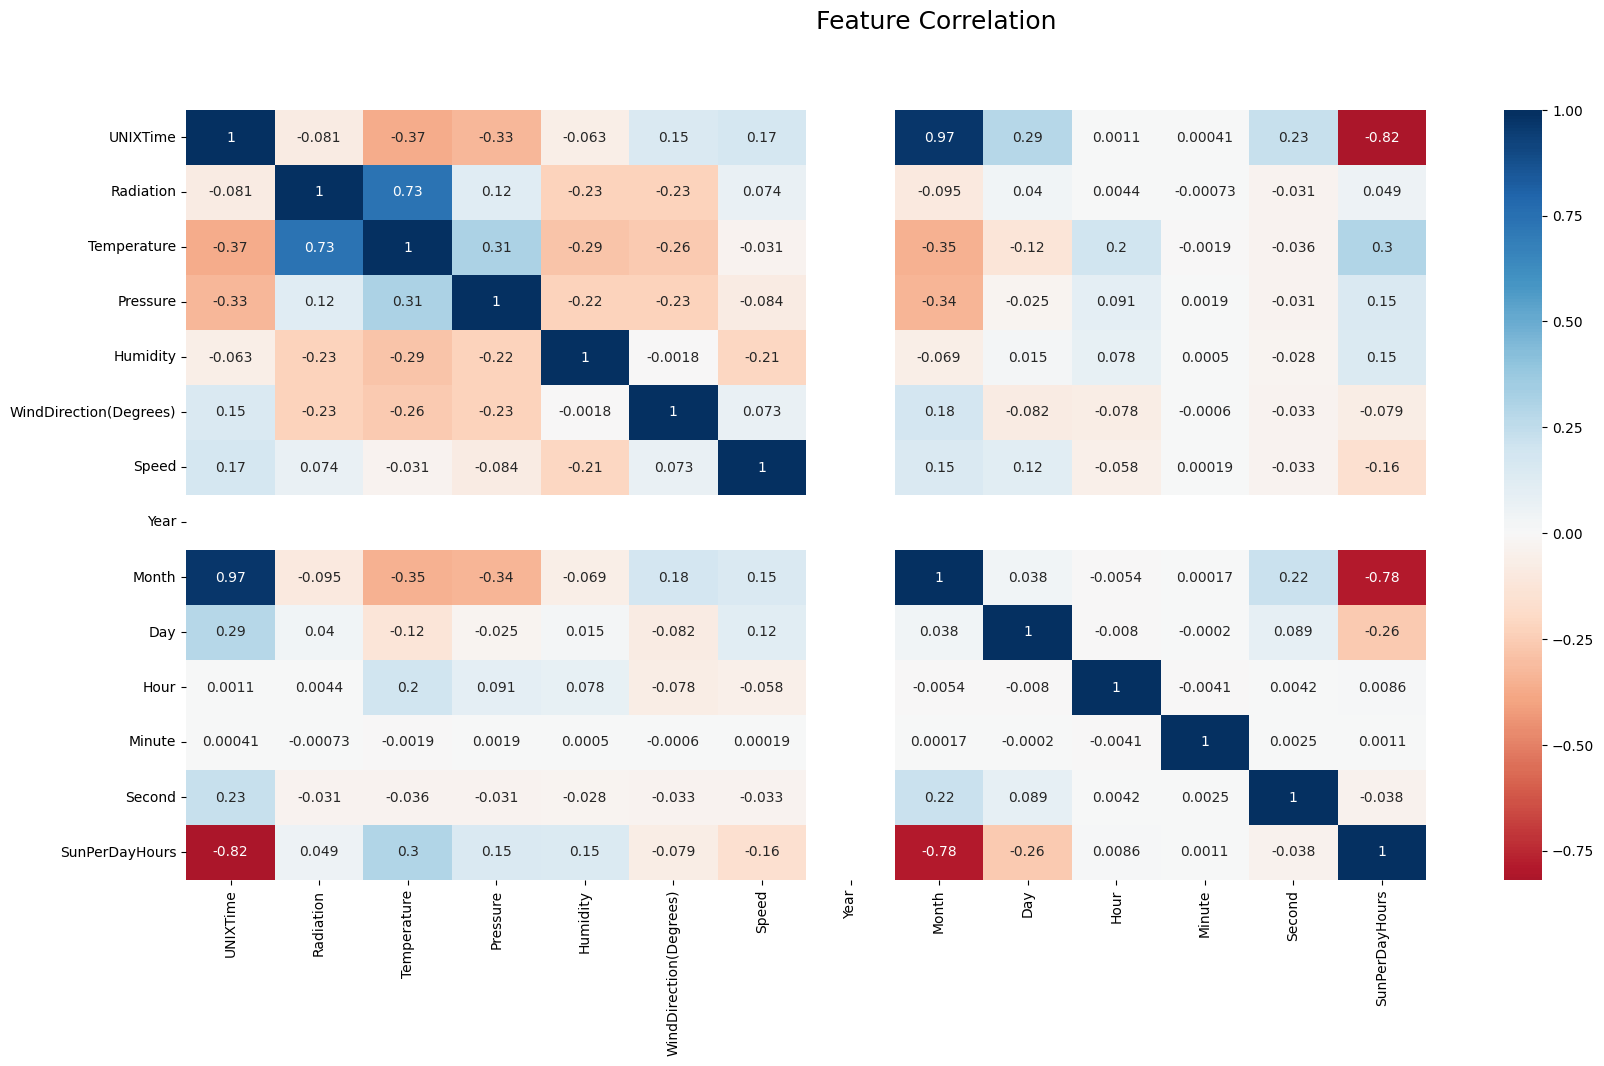

In [90]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(mydata.corr(), annot=True, cmap='RdBu', center=0)

In [91]:
# Eliminating the pozitive correlated data
mydata.drop('UNIXTime', axis = 1, inplace=True)
mydata.drop('Year', axis = 1, inplace=True)
mydata.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12


<Axes: >

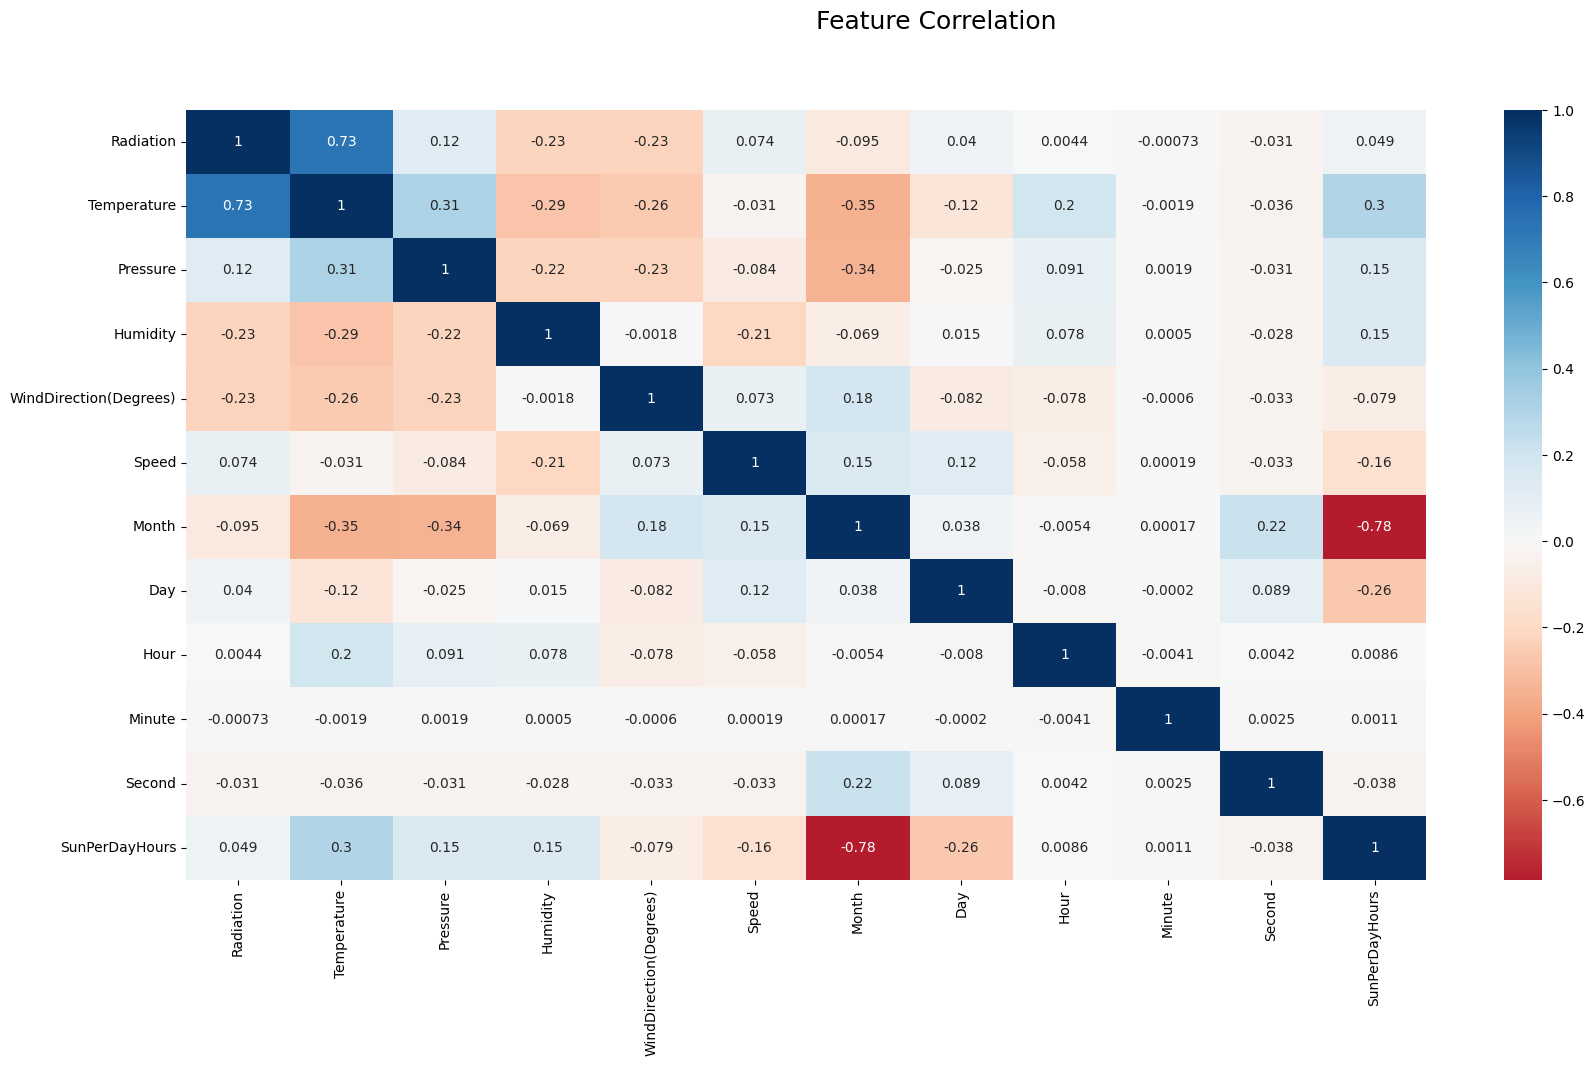

In [92]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(mydata.corr(), annot=True, cmap='RdBu', center=0)

<Axes: xlabel='Temperature', ylabel='Radiation'>

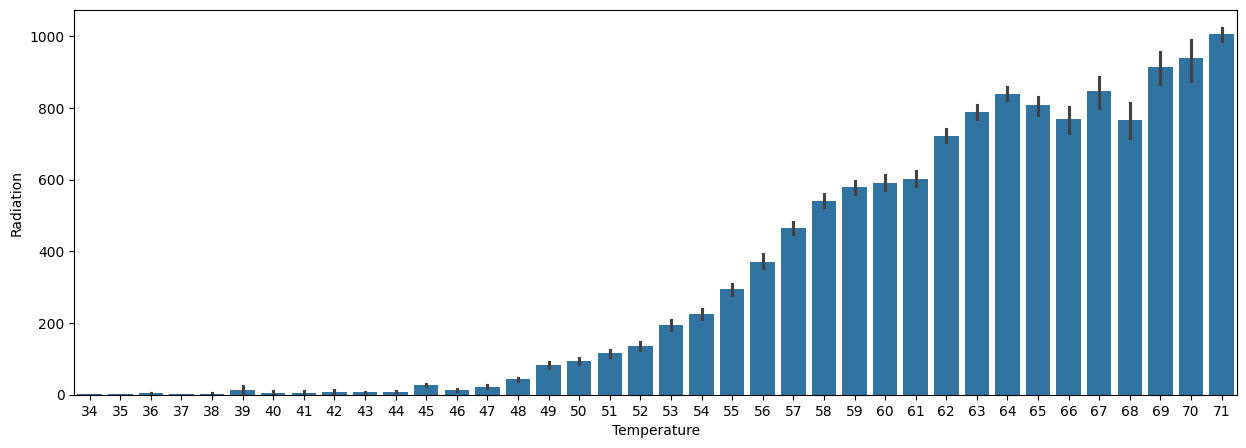

In [93]:
import seaborn as sns

fig2 = plt.figure(figsize=(15,5))
sns.barplot(x=mydata['Temperature'],y=mydata['Radiation'])

<Axes: xlabel='Humidity', ylabel='Radiation'>

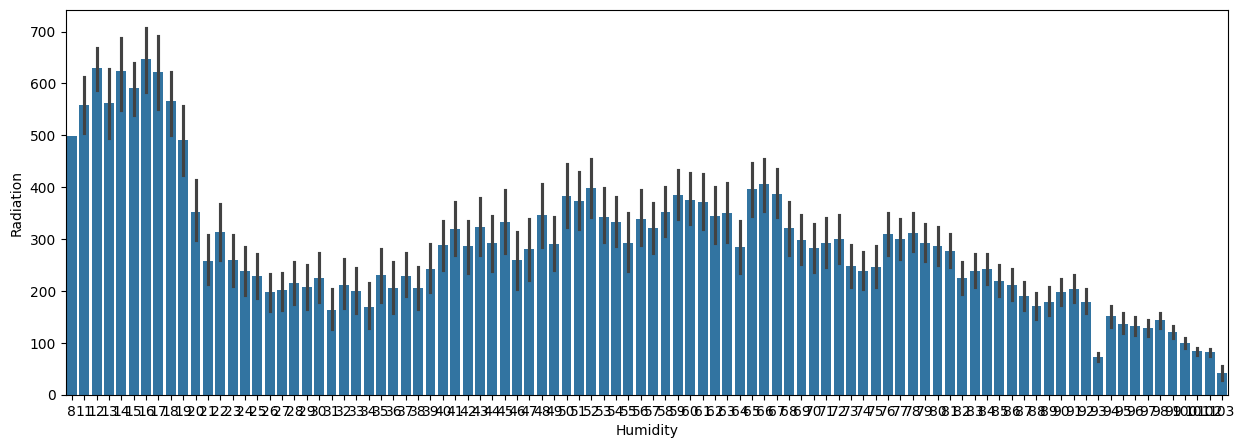

In [94]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=mydata['Humidity'],y=mydata['Radiation'])

In [95]:
# Temperature	Pressure	Humidity	WindDirection(Degrees)	Speed	Month	Day	Hour	Minute	Second	SunPerDayHours
threshold = 4

outliers = [] 

for i in mydata['Temperature']: 
    z = (i- np.mean(mydata['Temperature']))/np.std(mydata['Temperature'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Temperature are: ', outliers) 

The outliers in Temperature are:  []


In [96]:
outliers = [] 

for i in mydata['Pressure']: 
    z = (i- np.mean(mydata['Pressure']))/np.std(mydata['Pressure'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Pressure are: ', outliers)

The outliers in Pressure are:  []


In [97]:
outliers = [] 

for i in mydata['Humidity']: 
    z = (i- np.mean(mydata['Humidity']))/np.std(mydata['Humidity'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Humidity are: ', outliers)

The outliers in Humidity are:  []


In [98]:
outliers = [] 

for i in mydata['WindDirection(Degrees)']: 
    z = (i- np.mean(mydata['WindDirection(Degrees)']))/np.std(mydata['WindDirection(Degrees)'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in WindDirection(Degrees): ', outliers)

The outliers in WindDirection(Degrees):  []


In [99]:
outliers = [] 

for i in mydata['Speed']: 
    z = (i- np.mean(mydata['Speed']))/np.std(mydata['Speed'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Speed: ', outliers)

The outliers in Speed:  [20.25, 20.25, 20.25, 21.37, 23.62, 22.5, 22.5, 27.0, 20.25, 21.37, 23.62, 20.25, 29.25, 24.75, 23.62, 23.62, 24.75, 31.5, 23.62, 24.75, 20.25, 24.75, 23.62, 20.25, 20.25, 29.25, 23.62, 25.87, 33.75, 28.12, 36.0, 27.0, 24.75, 24.75, 31.5, 27.0, 32.62, 31.5, 30.37, 36.0, 22.5, 27.0, 25.87, 27.0, 33.75, 29.25, 21.37, 23.62, 20.25, 23.62, 33.75, 28.12, 36.0, 23.62, 25.87, 25.87, 32.62, 37.12, 25.87, 27.0, 21.37, 27.0, 24.75, 24.75, 28.12, 31.5, 23.62, 22.5, 24.75, 29.25, 28.12, 24.75, 30.37, 20.25, 25.87, 22.5, 21.37, 20.25, 30.37, 24.75, 31.5, 20.25, 30.37, 29.25, 31.5, 29.25, 34.87, 31.5, 38.25, 33.75, 21.37, 34.87, 24.75, 25.87, 28.12, 23.62, 32.62, 23.62, 32.62, 28.12, 29.25, 23.62, 21.37, 39.37, 32.62, 30.37, 38.25, 32.62, 21.37, 34.87, 37.12, 24.75, 40.5, 24.75, 28.12, 24.75, 31.5, 31.5, 22.5, 29.25, 25.87, 30.37, 32.62, 27.0, 29.25, 20.25, 22.5, 20.25, 20.25, 23.62, 20.25, 27.0, 20.25, 22.5, 24.75, 21.37, 21.37, 23.62, 20.25, 20.25, 20.25, 20.25, 20.25, 20.2

In [100]:
outliers = [] 

for i in mydata['Month']: 
    z = (i- np.mean(mydata['Month']))/np.std(mydata['Month'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Month: ', outliers)

The outliers in Month:  []


In [101]:
threshold = 4
outliers = [] 

for i in mydata['Day']: 
    z = (i- np.mean(mydata['Day']))/np.std(mydata['Day'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Day: ', outliers)

The outliers in Day:  []


In [102]:
outliers = [] 

for i in mydata['Hour']: 
    z = (i- np.mean(mydata['Hour']))/np.std(mydata['Hour'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Hour: ', outliers)

The outliers in Hour:  []


In [103]:
outliers = [] 

for i in mydata['Minute']: 
    z = (i- np.mean(mydata['Minute']))/np.std(mydata['Minute'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Minute: ', outliers)

The outliers in Minute:  []


In [104]:
outliers = [] 

for i in mydata['Second']: 
    z = (i- np.mean(mydata['Second']))/np.std(mydata['Second'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Second: ', outliers)

The outliers in Second:  []


In [105]:
outliers = [] 

for i in mydata['SunPerDayHours']: 
    z = (i- np.mean(mydata['SunPerDayHours']))/np.std(mydata['SunPerDayHours'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in SunPerDayHours: ', outliers)

The outliers in SunPerDayHours:  []


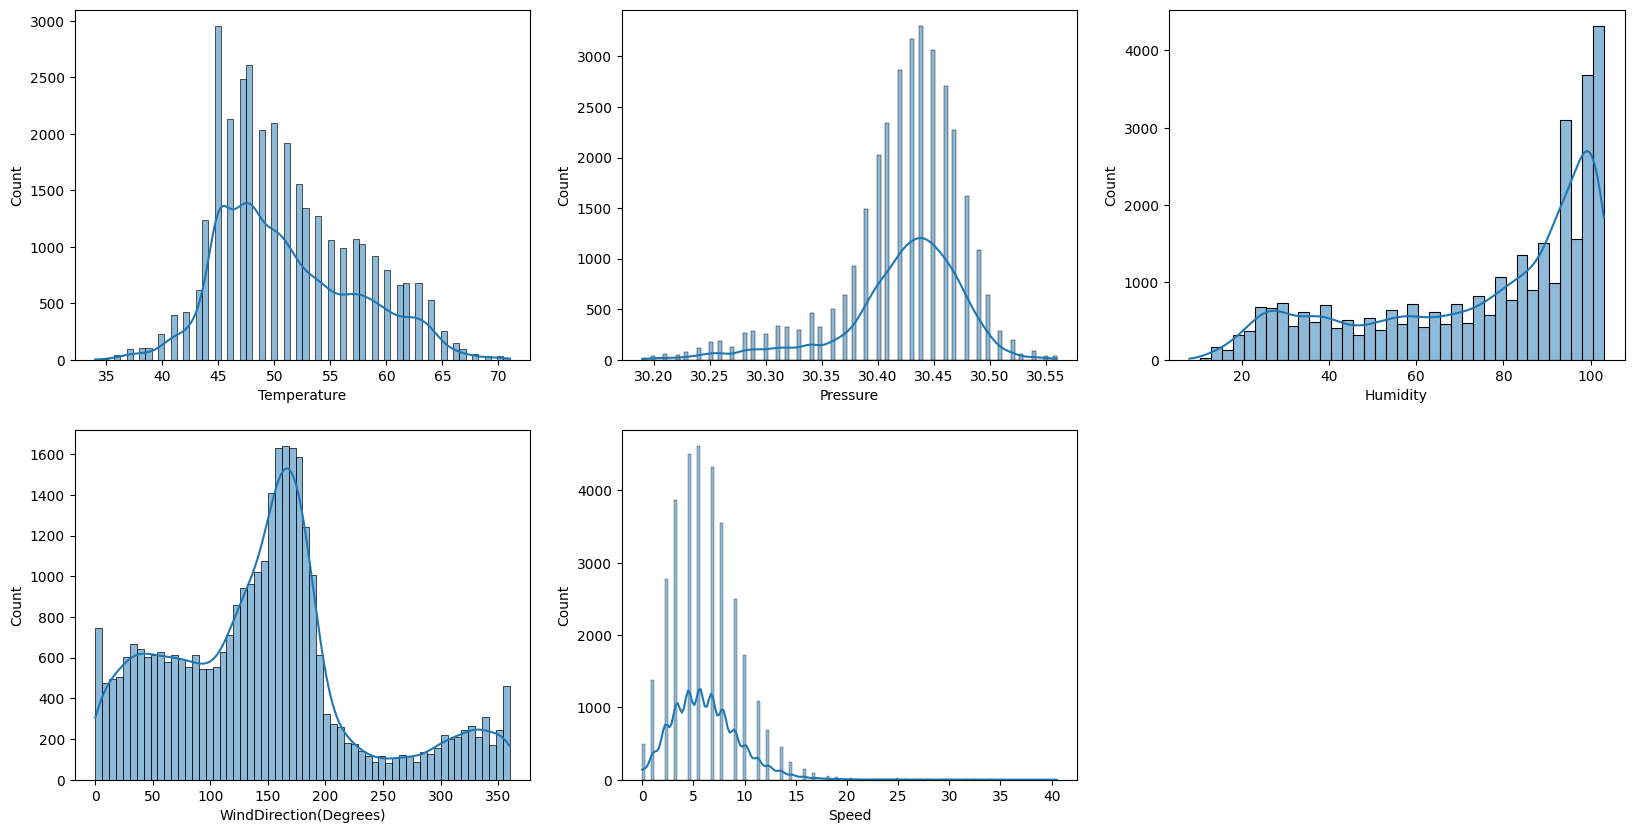

In [106]:
plt.figure(figsize=(20,10))

distr = mydata[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

for i, column in enumerate(distr):
    plt.subplot(2,3,i+1)
    sns.histplot(distr[column],kde=True)

In [107]:
from scipy import stats

mydata[(np.abs(stats.zscore(mydata)) < 4).all(axis=1)]

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,12,1,0,20,4,11
32682,1.17,44,30.42,102,117.78,6.75,12,1,0,15,1,11
32683,1.20,44,30.42,102,145.19,9.00,12,1,0,10,1,11
32684,1.23,44,30.42,101,164.19,7.87,12,1,0,5,2,11


In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Example: Creating sample train and test data
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50]
}

# Convert to DataFrame
train_data = pd.DataFrame(data)

# Define test data (it should be similar in structure)
test_data = pd.DataFrame({
    'feature1': [6, 7, 8],
    'feature2': [60, 70, 80]
})

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data
train_data_scaled = scaler.fit_transform(train_data)

# Transform the test data using the same scaler
test_data_scaled = scaler.transform(test_data)

# Convert back to DataFrame to retain feature names
train_data = pd.DataFrame(train_data_scaled, columns=train_data.columns)
test_data = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Scaler saved successfully as 'scaler.pkl'")


Scaler saved successfully as 'scaler.pkl'


     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


C:\Users\manoj\AppData\Local\Temp\ipykernel_23548\2025299507.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data'] = pd.to_datetime(df['Data'])


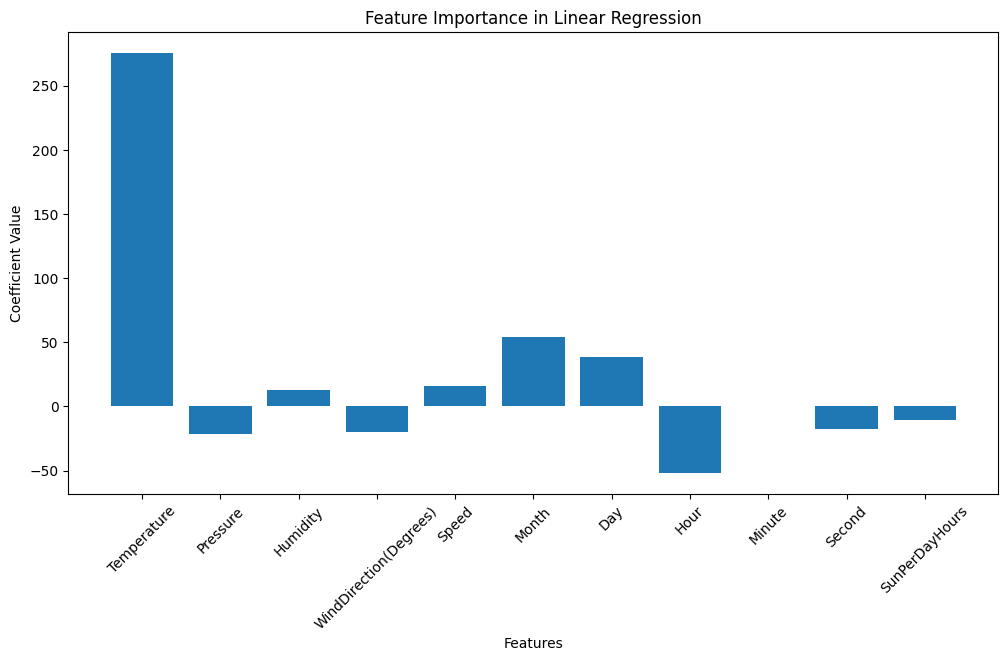

                        importance
Temperature             275.407631
Month                    53.885482
Day                      38.757276
Speed                    16.220381
Humidity                 13.219783
Minute                    0.151612
SunPerDayHours          -10.814226
Second                  -17.295932
WindDirection(Degrees)  -20.068009
Pressure                -21.807388
Hour                    -51.901764


In [109]:
df = pd.read_csv("SolarPrediction.csv")

# Display first few rows to check column names
print(df.head())

# Convert 'Data' column to datetime
df['Data'] = pd.to_datetime(df['Data'])

# Extract Month, Day from 'Data' column
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day

# Convert 'Time' column to datetime and extract Hour, Minute, Second
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

# Calculate SunPerDayHours (difference between TimeSunSet and TimeSunRise)
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['SunPerDayHours'] = (df['TimeSunSet'] - df['TimeSunRise']).dt.total_seconds() / 3600  # Convert to hours

# Define features and target column
columns_ = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 
            'Speed', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SunPerDayHours']

target_column = 'Radiation'  # Replace if needed

# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in the dataset.")

# Extract features (X) and target (y)
train_data = df[columns_]
train_labels = df[target_column]

# Standardize features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Convert back to DataFrame
train_data = pd.DataFrame(train_data_scaled, columns=train_data.columns)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Train Linear Regression model
model1 = LinearRegression()
model1.fit(train_data, train_labels)

# Feature importance visualization
plt.figure(figsize=(12, 6))
plt.bar(columns_, model1.coef_)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

# Display feature importances
feature_importances = pd.DataFrame(model1.coef_, index=columns_, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

In [110]:
X = df[columns_]
y = df[target_column]

# Split dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=columns_)
X_test = pd.DataFrame(X_test_scaled, columns=columns_)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Train Linear Regression model
Model1 = LinearRegression()
Model1.fit(X_train, y_train)

# Make predictions on the test set
Pred1 = Model1.predict(X_test)

# Initialize lists for storing metrics
mae_list, mse_list, r2_list, var_list, max_list = [], [], [], [], []

# Compute and store metrics
mae_list.append(mean_absolute_error(y_test, Pred1))
mse_list.append(mean_squared_error(y_test, Pred1))
r2_list.append(r2_score(y_test, Pred1))
var_list.append(explained_variance_score(y_test, Pred1))
max_list.append(max_error(y_test, Pred1))

# Print performance metrics
print('MAE : ', mae_list[-1])
print('MSE : ', mse_list[-1])
print('R^2 : ', r2_list[-1])
print('Var : ', var_list[-1])
print('Max : ', max_list[-1])


MAE :  146.3776391401063
MSE :  37428.576011279794
R^2 :  0.6232533256548274
Var :  0.6233221005070231
Max :  926.7936706442915


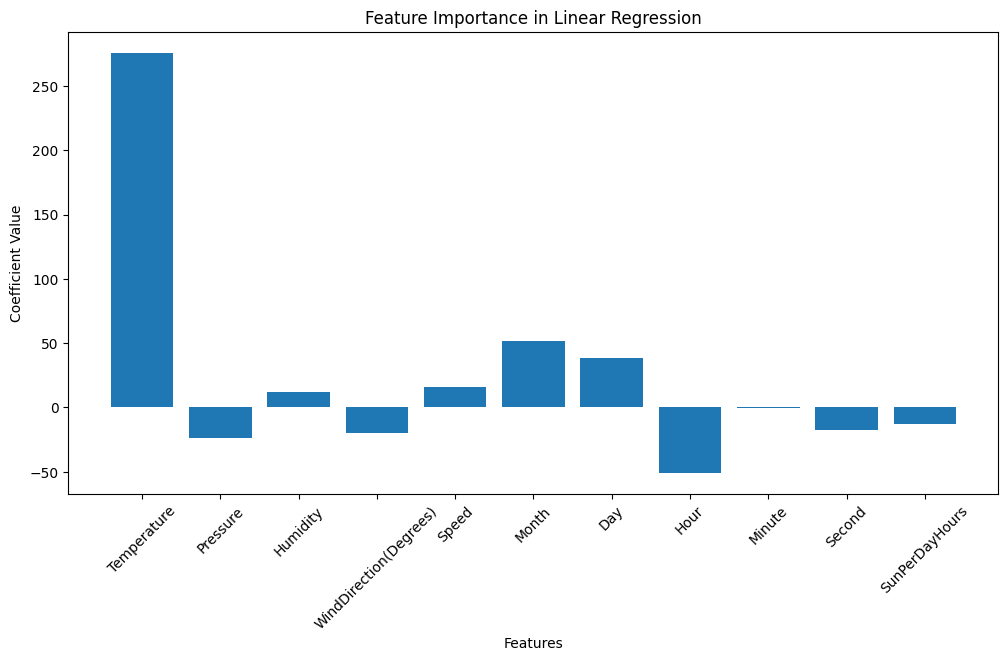

                        importance
Temperature             275.538180
Month                    51.341657
Day                      38.301457
Speed                    15.931190
Humidity                 12.143100
Minute                   -0.592045
SunPerDayHours          -13.159232
Second                  -17.380582
WindDirection(Degrees)  -20.085044
Pressure                -23.516398
Hour                    -51.013583


In [111]:
plt.figure(figsize=(12, 6))
plt.bar(columns_, Model1.coef_)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

# Display feature importances
feature_importances = pd.DataFrame(Model1.coef_, index=columns_, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

In [112]:
Model3 = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.8, gamma=0,
                      max_depth=9, min_child_weight=4, subsample=0.8, random_state=42)
Model3.fit(X_train, y_train)

# Make predictions
Pred3 = Model3.predict(X_test)

# Compute and store performance metrics
mae = mean_absolute_error(y_test, Pred3)
mse = mean_squared_error(y_test, Pred3)
r2 = r2_score(y_test, Pred3)
var = explained_variance_score(y_test, Pred3)
max_err = max_error(y_test, Pred3)

# Print performance metrics
print('MAE : ', mae)
print('MSE : ', mse)
print('R^2 : ', r2)
print('Var : ', var)
print('Max : ', max_err)

MAE :  38.73285610767
MSE :  7557.899585125744
R^2 :  0.9239240752073292
Var :  0.9239252403045332
Max :  916.6587768554687


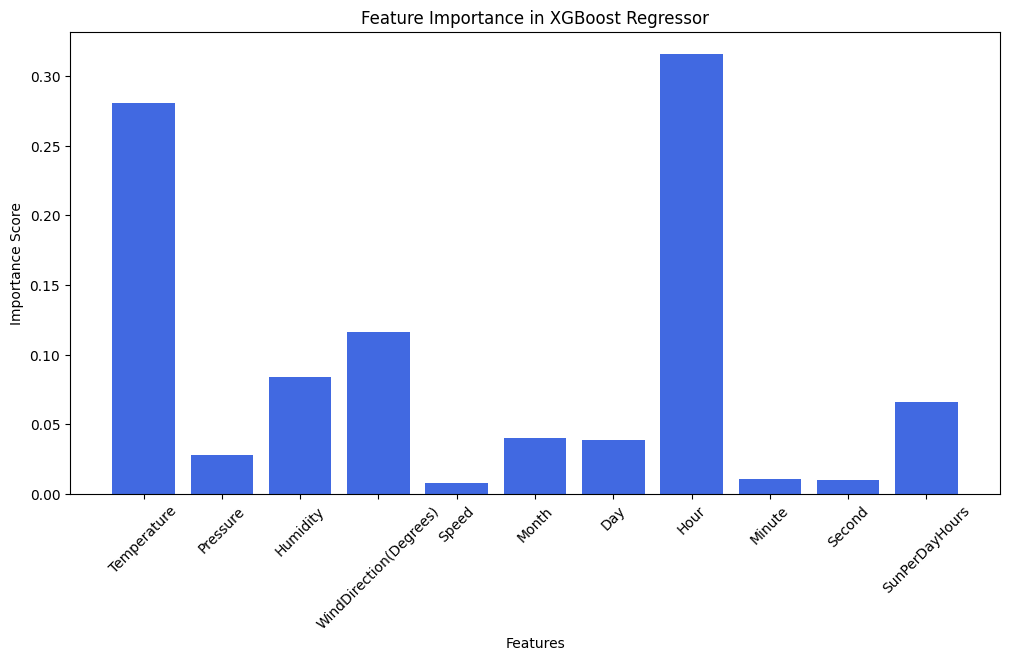

                        importance
Hour                      0.315822
Temperature               0.281001
WindDirection(Degrees)    0.116241
Humidity                  0.084056
SunPerDayHours            0.066114
Month                     0.040246
Day                       0.039084
Pressure                  0.028227
Minute                    0.011094
Second                    0.009952
Speed                     0.008163


In [113]:
# Feature importance visualization
plt.figure(figsize=(12, 6))
plt.bar(columns_, Model3.feature_importances_, color='royalblue')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in XGBoost Regressor")
plt.show()

# Display feature importances
feature_importances = pd.DataFrame(Model3.feature_importances_, index=columns_, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

In [114]:
Model4 = DecisionTreeRegressor(max_depth=10, max_features=None, min_samples_split=4, random_state=1)
Model4.fit(X_train, y_train)

# Make predictions
Pred4 = Model4.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, Pred4)
mse = mean_squared_error(y_test, Pred4)
r2 = r2_score(y_test, Pred4)
var = explained_variance_score(y_test, Pred4)
max_err = max_error(y_test, Pred4)

# Append metrics to lists
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)
var_list.append(var)
max_list.append(max_err)

# Print performance metrics
print('MAE : ', mae)
print('MSE : ', mse)
print('R^2 : ', r2)
print('Var : ', var)
print('Max : ', max_err)

MAE :  42.33378267924987
MSE :  10065.15417832609
R^2 :  0.8986866782665475
Var :  0.8986866915242613
Max :  922.687142857143


In [117]:
print('      LinearRegression  RandomForest  XGBoost  DecisionTree')
print('MAE ', mae_list)
print('MSE ', mse_list)
print('R2  ', r2_list)
print('Var ', var_list)


      LinearRegression  RandomForest  XGBoost  DecisionTree
MAE  [146.3776391401063, 30.589462557356995, 42.770416329421195, 38.64411134903641]
MSE  [37428.576011279794, 6560.81655127667, 7985.016994095892, 12115.060078678496]
R2   [0.6232533256548274, 0.9339604633652817, 0.9196248183150569, 0.8780528387519058]
Var  [0.6232533256548274, 0.9339604633652817, 0.9196248183150569, 0.8780528387519058]


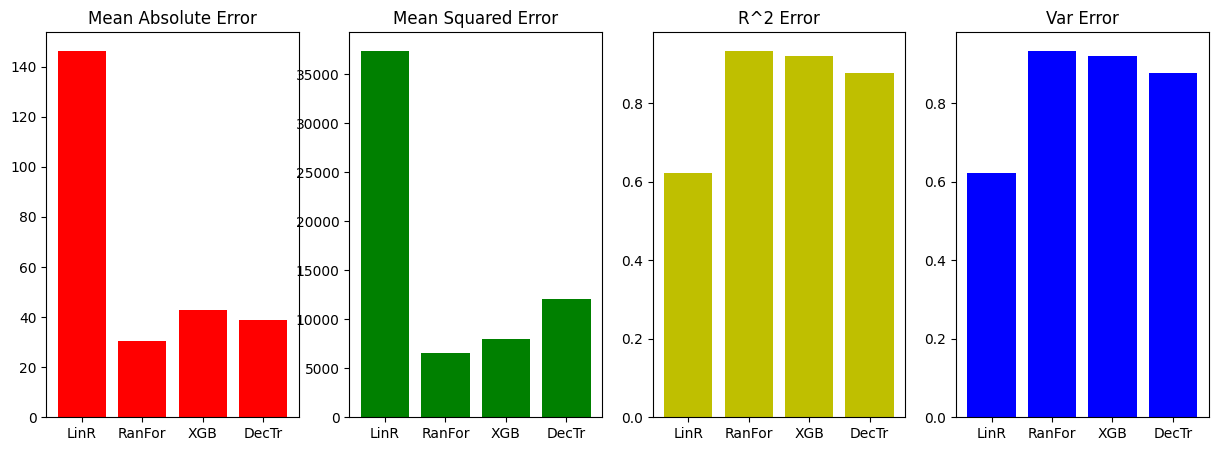

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train models
model1 = LinearRegression()
model1.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

dec_tree_model = DecisionTreeRegressor(random_state=42)
dec_tree_model.fit(X_train, y_train)

rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
rand_forest_model.fit(X_train, y_train)

# Define feature names
columns_ = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'SunPerDayHours']


# Predictions for all models
linr_preds = model1.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dec_tree_preds = dec_tree_model.predict(X_test)
rand_forest_preds = rand_forest_model.predict(X_test)

# Calculate performance metrics
mae_list = [mean_absolute_error(y_test, linr_preds),
            mean_absolute_error(y_test, rand_forest_preds),
            mean_absolute_error(y_test, xgb_preds),
            mean_absolute_error(y_test, dec_tree_preds)]

mse_list = [mean_squared_error(y_test, linr_preds),
            mean_squared_error(y_test, rand_forest_preds),
            mean_squared_error(y_test, xgb_preds),
            mean_squared_error(y_test, dec_tree_preds)]

r2_list = [r2_score(y_test, linr_preds),
           r2_score(y_test, rand_forest_preds),
           r2_score(y_test, xgb_preds),
           r2_score(y_test, dec_tree_preds)]

var_list = [r2_score(y_test, linr_preds),
            r2_score(y_test, rand_forest_preds),
            r2_score(y_test, xgb_preds),
            r2_score(y_test, dec_tree_preds)]

plot_labels = ["LinR", "RanFor", "XGB", "DecTr"]

# Ensure all metric lists have 4 values
metric_lists = [mae_list, mse_list, r2_list, var_list]
for i, metric in enumerate(metric_lists):
    if len(metric) != len(plot_labels):
        raise ValueError(f"Metric list at index {i} does not have 4 elements: {metric}")

# Plot performance metrics
f, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
ax1.bar(plot_labels, mae_list, color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels, mse_list, color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels, r2_list, color='y')
ax3.set_title("R^2 Error")
ax4.bar(plot_labels, var_list, color='b')
ax4.set_title("Var Error")
plt.show()


      LinearRegression      RandomForest        XGBoost         DecisionTrees
MAE_wn-MAE [-0.5369430369184158, -0.8910084574785664, 1.6376647661363393, -1.0513595498787893]
MSE_wn-MSE [-336.60650406982313, -252.68559017756797, 222.80117601546954, -488.6181125071744]
R2_wn-R2 [0.005570870475747114, 0.0029354176455099745, -0.0018359409394455017, 0.0055456897388621584]
Var_wn-Var [0.005603633325767854, 0.0029386714464416652, -0.0018263104423253962, 0.005576764216771113]
Max_wn-Max [0.6669297282355728, -19.02748000000031, -47.24627685546875, -119.88353571428581]


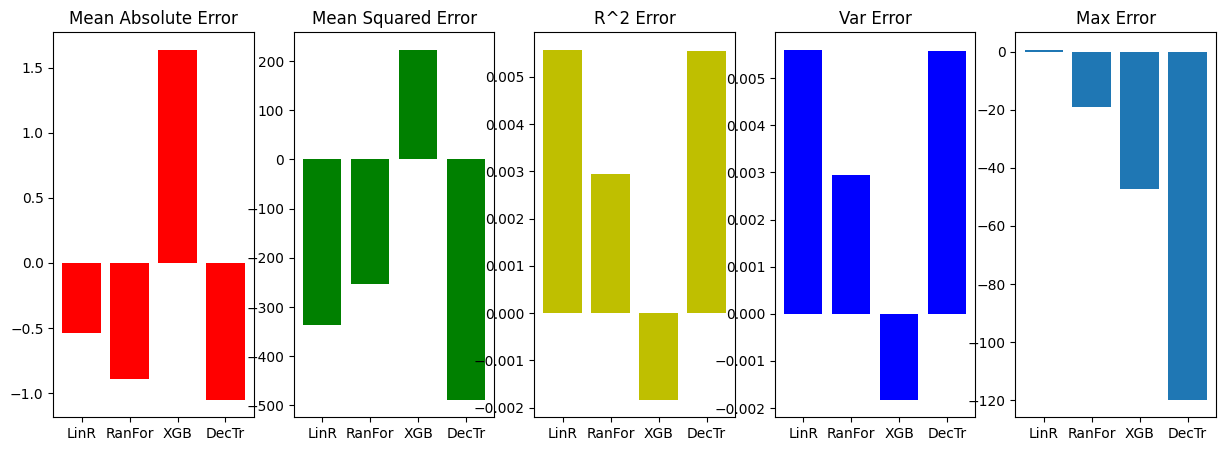

In [80]:
import operator

MAE_wn =  [145.53663438816486, 30.260374034873056, 36.45372562953167, 42.841940617746474]
MSE_wn = [36765.7328385265, 6494.071158381085, 7011.396019976234, 10347.625717452076]
R2_wn = [0.6308764850087383, 0.9348003103021767, 0.9296064312044026, 0.8961110881859694]
Var_wn = [0.6309326107714461, 0.9348176119897434, 0.9296161064797657, 0.896182079743132]
Max_wn = [1047.1185829606309, 881.2118000000008, 1033.2645776367187, 922.72375]

MAE = [146.07357742508327, 31.151382492351622, 34.81606086339533, 43.89330016762526]
MSE = [37102.33934259632, 6746.756748558653, 6788.594843960765, 10836.24382995925]
R2 = [0.6253056145329912, 0.9318648926566667, 0.9314423721438481, 0.8905653984471072]
Var = [0.6253289774456783, 0.9318789405433018, 0.9314424169220911, 0.8906053155263609]
Max = [1046.4516532323953, 900.2392800000011, 1080.5108544921875, 1042.6072857142858]

print('      LinearRegression      RandomForest        XGBoost         DecisionTrees')
print('MAE_wn-MAE', list(map(operator.sub, MAE_wn, MAE)))
print('MSE_wn-MSE', list(map(operator.sub, MSE_wn, MSE)))
print('R2_wn-R2', list(map(operator.sub, R2_wn, R2)))
print('Var_wn-Var', list(map(operator.sub, Var_wn, Var)))
print('Max_wn-Max', list(map(operator.sub, Max_wn, Max)))

# Plot performance comparison
f, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1,ncols=5,figsize=(15,5))
ax1.bar(plot_labels,list(map(operator.sub, MAE_wn, MAE)),color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,list(map(operator.sub, MSE_wn, MSE)),color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,list(map(operator.sub, R2_wn, R2)),color='y')
ax3.set_title("R^2 Error")
ax4.bar(plot_labels,list(map(operator.sub, Var_wn, Var)),color='b')
ax4.set_title("Var Error")
ax5.bar(plot_labels,list(map(operator.sub, Max_wn, Max)))
ax5.set_title("Max Error")
plt.show()


MAE : 42.4723825931399
MSE : 10150.869708086071
R^2 : 0.897823887206394
Var : 0.8978238890679877
Max : 922.6871428571429
Old Parameters ---------------------- New Parameters
MAE : 42.841940617746474 ----------- 42.4723825931399
MSE : 10347.625717452076 ----------- 10150.869708086071
R^2 : 0.8961110881859694 ----------- 0.897823887206394
Var : 0.896182079743132 ----------- 0.8978238890679877
Max : 922.72375 ----------- 922.6871428571429


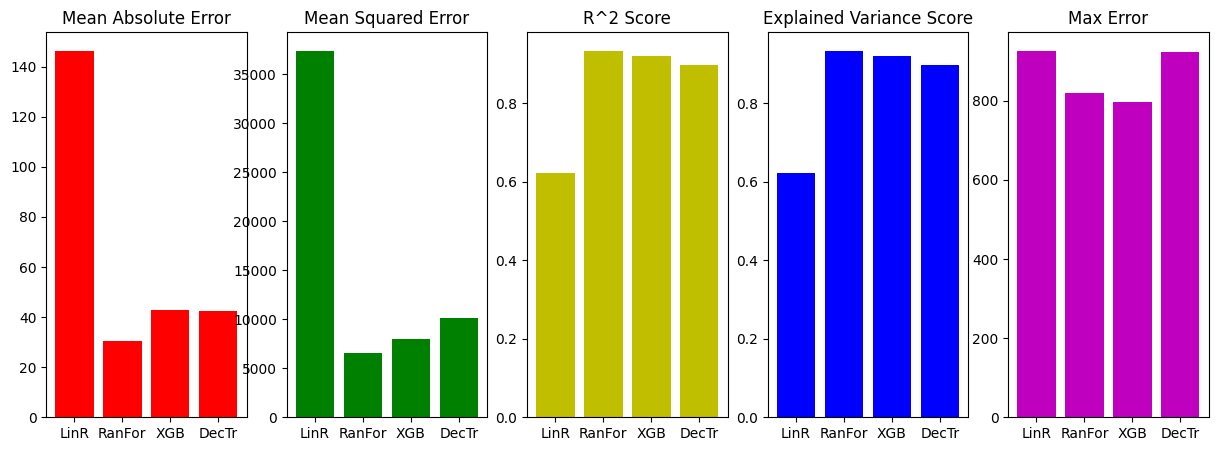

In [120]:

dec_tree_model = DecisionTreeRegressor(
    ccp_alpha=0.0, 
    criterion='squared_error',
    max_depth=10,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, 
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    random_state=3, 
    splitter='best'
)
dec_tree_model.fit(X_train, y_train)

rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
rand_forest_model.fit(X_train, y_train)

# Predictions for all models
linr_preds = model1.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dec_tree_preds = dec_tree_model.predict(X_test)
rand_forest_preds = rand_forest_model.predict(X_test)



plot_labels = ["LinR", "RanFor", "XGB", "DecTr"]

# Print metrics
for metric_name, values in metrics.items():
    print(f"{metric_name} : {values[3]}")

# Old vs New parameters comparison
old_metrics = {
    "MAE": 42.841940617746474,
    "MSE": 10347.625717452076,
    "R^2": 0.8961110881859694,
    "Var": 0.896182079743132,
    "Max": 922.72375
}

new_metrics = {
    "MAE": metrics["MAE"][3],
    "MSE": metrics["MSE"][3],
    "R^2": metrics["R^2"][3],
    "Var": metrics["Var"][3],
    "Max": metrics["Max"][3]
}

print("Old Parameters ---------------------- New Parameters")
for key in old_metrics:
    print(f"{key} : {old_metrics[key]} ----------- {new_metrics[key]}")

# Plot performance comparison
f, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
colors = ['r', 'g', 'y', 'b', 'm']
titles = ["Mean Absolute Error", "Mean Squared Error", "R^2 Score", "Explained Variance Score", "Max Error"]

for ax, (metric_name, values), color, title in zip(axes, metrics.items(), colors, titles):
    ax.bar(plot_labels, values, color=color)
    ax.set_title(title)

plt.show()
